In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\DS FILES\car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.shape

(112, 2)

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [31]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


# Find the best linear relationship between year and price.

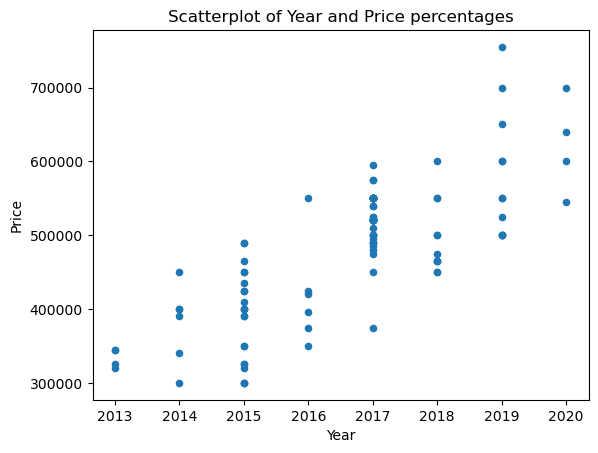

In [4]:
data.plot.scatter(x='Year', y='Price',title='Scatterplot of Year and Price percentages')
plt.show() 

# This plot show Positive Correlation between year and price.

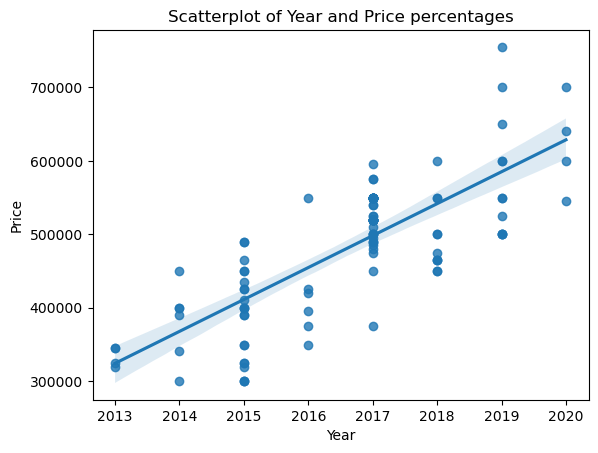

In [5]:
sns.regplot(x='Year', y='Price', data=data).set(title='Scatterplot of Year and Price percentages')
plt.show() 

In [6]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [45]:
#Spliting data into freature and target
y=data['Price']  #target /output
X=data.drop(['Price'],axis=1)

In [47]:
X.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [48]:
y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [34]:
y = data['Price'].values.reshape(-1, 1)  # change to  array form
X = data['Year'].values.reshape(-1, 1)

In [41]:
type(X)

numpy.ndarray

In [42]:
type(y)

numpy.ndarray

In [12]:
data['Year'].values

array([2018, 2019, 2019, 2018, 2018, 2015, 2016, 2017, 2017, 2017, 2019,
       2018, 2017, 2019, 2017, 2017, 2017, 2017, 2019, 2017, 2018, 2019,
       2015, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2019, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2018, 2020, 2019, 2019, 2018, 2019,
       2019, 2018, 2019, 2018, 2016, 2018, 2013, 2018, 2013, 2013, 2017,
       2017, 2014, 2017, 2014, 2016, 2015, 2017, 2017, 2017, 2015, 2017,
       2017, 2015, 2015, 2015, 2015, 2017, 2015, 2013, 2017, 2017, 2015,
       2015, 2015, 2015, 2015, 2014, 2015, 2017, 2015, 2015, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2020, 2020,
       2020, 2016, 2015, 2015, 2017, 2014, 2014, 2015, 2016, 2014, 2015,
       2016, 2015], dtype=int64)

In [13]:
data['Price'].values

array([465000, 755000, 700000, 465000, 465000, 350000, 425000, 575000,
       509999, 575000, 500000, 500000, 500000, 600000, 475000, 500000,
       500000, 550000, 500000, 500000, 500000, 500000, 434999, 550000,
       550000, 550000, 550000, 550000, 550000, 550000, 650000, 550000,
       550000, 550000, 450000, 550000, 550000, 486000, 475000, 545000,
       525000, 600000, 550000, 550000, 550000, 450000, 500000, 450000,
       396000, 600000, 325000, 550000, 345000, 345000, 525000, 550000,
       341000, 550000, 450000, 550000, 490000, 540000, 540000, 595000,
       490000, 495000, 525000, 400000, 465000, 300000, 450000, 490000,
       300000, 320000, 490000, 490000, 450000, 325000, 409999, 400000,
       390000, 390000, 390000, 480000, 325000, 320000, 520000, 520000,
       520000, 520000, 520000, 520000, 520000, 520000, 520000, 520000,
       520000, 640000, 700000, 600000, 350000, 400000, 350000, 375000,
       400000, 400000, 300000, 375000, 300000, 425000, 420000, 425000],
     

# Linear regression model

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.metrics  import mean_squared_error, r2_score,mean_absolute_error

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [16]:
print('MSE is:', mean_squared_error(y_test,y_pred))
print('R squared  is:', r2_score(y_test,y_pred))
print('MAE is:', mean_absolute_error(y_test,y_pred))

MSE is: 4326906256.829671
R squared  is: 0.36759313425902185
MAE is: 53534.77957001264


# Graph for linear reggersion train and test sets

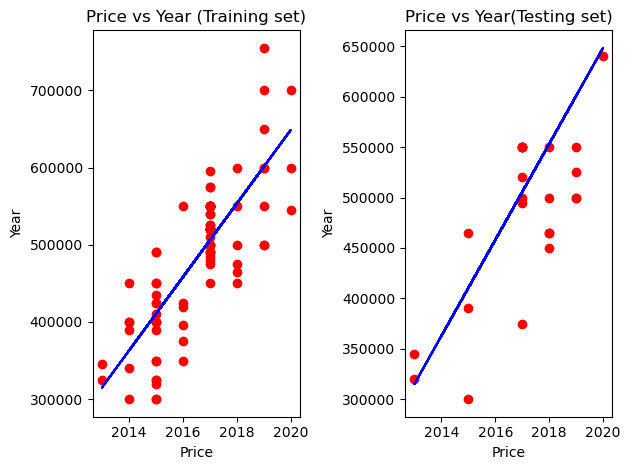

In [17]:

#plot for the train:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red') # plotting the observation line 
plt.plot(X_train, model.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Price vs Year (Training set)") # stating the title of the graph
 
plt.xlabel('Price') # adding the name of x-axis
plt.ylabel('Year') # adding the name of y-axis

#plot for the TEST
plt.subplot(1, 2, 2) 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, model.predict(X_train), color='blue')

plt.title("Price vs Year(Testing set)") 
plt.xlabel('Price') 
plt.ylabel('Year') 

plt.tight_layout()
plt.show() 


# Can you predict the possible price of a 2022 model second-hand grand i10?

In [18]:
price=lr.predict([[2022]]) 
print(' Possible price of a 2022 model second-hand grand i10 :',price)

 Possible price of a 2022 model second-hand grand i10 : [[743601.61594504]]


# Lasso regression model

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
model_lasso=lasso.fit(X_train, y_train)
y_pred_lasso=model_lasso.predict(X_test)


In [20]:
print('MSE is:', mean_squared_error(y_test,y_pred_lasso))
print('R squared  is:', r2_score(y_test,y_pred_lasso))
print('MAE is:', mean_absolute_error(y_test,y_pred_lasso))

MSE is: 4326859771.015669
R squared  is: 0.3675999284778446
MAE is: 53534.33030898286



'''MAE (Mean Absolute Error) is the mean absolute difference between the actual and the predicted value, 
  whilst MAPE (Mean Absolute Percentage Error) is the mean absolute percentage difference between the 
  actual and the predicted value. MAPE can be used to find the accurary of the regression'''

# Find out which one is performing better between linear and lasso regression

In [21]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [22]:
MAPE = MAPE(y_test,y_pred)
print("MAPE value: ",MAPE)
Accuracy = 100 - MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

MAPE value:  11.931971887668066
Accuracy of Linear Regression: 88.07%.


In [26]:
Lasso_MAPE = MAPE(y_test,y_pred_lasso)
print("MAPE value: ",Lasso_MAPE)
Accuracy = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

MAPE value:  22.267173884611594
Accuracy of Lasso Regression: 77.73%.


The the above we can see that linear regression is more accurate than lasso regression

In [28]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

In [29]:
data_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze(),'Diff':(y_pred.squeeze()-y_test.squeeze()) })
data_preds1 = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_lasso.squeeze(),'Diff':(y_pred_lasso.squeeze()-y_test.squeeze())})
display_side_by_side(data_preds,data_preds1, titles=['Linear test model ','Lasso test model '])

,Actual,Predicted,Diff
0,525000,600775.912521,75775.912521
1,495000,505558.776905,10558.776905
2,465000,553167.344713,88167.344713
3,450000,553167.344713,103167.344713
4,550000,553167.344713,3167.344713
5,300000,410341.641289,110341.641289
6,550000,505558.776905,-44441.223095
7,500000,553167.344713,53167.344713
8,500000,600775.912521,100775.912521
9,550000,600775.912521,50775.912521
